## Esercizo 1
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati0.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Dati0.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``

In [10]:
import numpy as np
import scipy.linalg as spLin
from scipy.io import loadmat
import matplotlib.pyplot as plt
import RisolviSis

dati = loadmat('Dati0.mat')
A = dati["A"]
b = dati["b"]

Matrice di grandi dimensioni
Density:  1.2
Matrice sparsa
raggio spettrale Gauss-Seidel  0.9777864028930714
it =  645
Matrice A simmetrica
Autovalori tutti positivi
Matrice A simmetrica definita positiva
it =  38


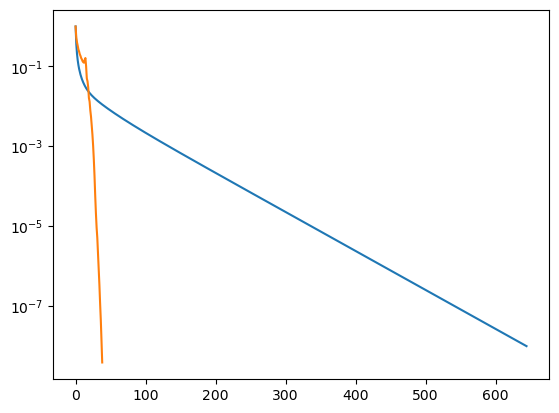

In [34]:
n, m = A.shape
flag = 0
if m != n:
    print("Matrice non quadrtata")
    flag = 1
elif m >= 100 or n >= 100:
    print("Matrice di grandi dimensioni")
density = (np.count_nonzero(A) / m**2) * 100
print("Density: ", density)
if density > 33:
    print("Matrice densa")
else:
    print("Matrice sparsa")
x0 = np.zeros((n, 1))
toll = 1e-8
it_max = 1000
x, it, er_vet = gauss_seidel(A, b, x0, toll, it_max)
print("it = ", it)
plt.semilogy(np.arange(it), er_vet)
if np.array_equal(A, A.T):
    print("Matrice A simmetrica")
    if np.all(np.linalg.eigvals(A)) > 0:
        print("Autovalori tutti positivi")
        print("Matrice A simmetrica definita positiva")
        x_CG, it_CG, sol_vet_CG, er_vet_CG = conjugate_gradient(A, b, x0, it_max, toll)
        print("it = ", it_CG)
        plt.semilogy(np.arange(it_CG + 1), er_vet_CG)

In [ ]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d = np.diag(A) 
    D = np.diag(d)
    E = np.tril(A, -1) 
    F = np.triu(A, 1)
    M = D + E
    N = -F
    T=np.dot(np.linalg.inv(M), N)
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ", raggiospettrale)
    it = 0
    er_vet = []
    while it <= it_max and errore >= toll: 
        temp = b + np.dot(N, x0)
        x, flag = RisolviSis.Lsolve(M, temp)
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x) 
        er_vet.append(errore)
        x0 = x.copy()
        it = it + 1
    return x,it,er_vet

In [33]:
def conjugate_gradient(A,b,x0,itmax,tol):
    
#Metodo del gradiente coniugato per la soluzione di un sistema lineare con matrice dei coefficienti simmetrica e definita positiva
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A.dot(x) - b 
    p = -r 
    it = 0
    nb = np.linalg.norm(b) 
    errore = np.linalg.norm(r) / nb
    vec_sol=[]
    vec_sol.append(x)
    vet_err=[]
    vet_err.append(errore)
# utilizzare il metodo del gradiente coniugato per trovare la soluzione
    while errore >= tol and it < it_max: 
        it = it + 1
        Ap = A.dot(p)
        rtr = np.dot(r.T, r) 
        alpha = rtr / np.dot(p.T, Ap) 
        x = x + (alpha * p)
        vec_sol.append(x)
        r = r + (alpha * Ap) 
        gamma = np.dot(r.T, r) / rtr
        errore = np.linalg.norm(r) / nb
        vet_err.append(errore)
        p = -r + (gamma * p)
   
    
    return x, it, vec_sol, vet_err

In [36]:
dati = loadmat('Dati1.mat')
A = dati["A"]
b = dati["b"]

In [50]:
m, n = A.shape
flag = 0
print(A.shape)
if m != n:
    print("Matrice non quadrata")
    flag = 1
if flag == 0:
    if m >= 100 or n >= 100:
        print("Matrice di grandi dimensioni")
        density = np.count_nonzero(A) / m**2
        print("Densita': ", density)
        if density * 100 < 33:
            print("Matrice sparsa")
        else:
            print("Matrice densa")
    else:
        print("Matrice di piccole dimensioni")
        x = LUsolve(A, b)
        print("x = ", x)
else:
    print("Sistema sovradeterminato")

(20, 20)
Matrice di piccole dimensioni
x =  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 

In [49]:
def LUsolve(A, b):
    m, n = A.shape
    X = np.zeros((n, n))
    flag = 0
    if np.all(np.diag(A)) != True:
        flag = 1
    
    PT, L, U = spLin.lu(A)
    P = PT.T.copy()
    if flag == 0:
        for i in range (n):
            y, flag = RisolviSis.Lsolve(L, P@b)
            x, flag = RisolviSis.Usolve(U, y)
            X[:, i] = x.reshape(n,)
    else:
        print("Elemento diagonale nullo")
        X = []
    return X